<a href="https://colab.research.google.com/github/milicaci/obuznie/blob/master/Confidential_intervals_DZ_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок »</b></h3>


In [2]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [3]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]


print(mean_confidence_interval(a, 0.60))
 

(11.707786838827133, 12.391304347826088, 13.074821856825043)


<h3 style="text-align: center;"><b>Выборы в президенты или зачем нам доверительные интерваллы?!</b></h3>

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>



In [4]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',',  error_bad_lines=False) # Откроем датасет


df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6
...,...,...,...
4069,WV,Webster,34.2
4070,WV,Wetzel,37.8
4071,WV,Wirt,31.1
4072,WV,Wood,32.9


Среднее по всей выборке:  44.07946954813346


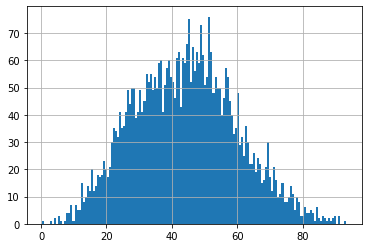

In [5]:
df['%'].hist(bins=150)
print('Среднее по всей выборке: ',df['%'].mean())

In [6]:
some_states_1 = ['AK','OH','WV','ME','CA','MD']
some_states_2 = ['WA','AK','DE']
some_states_3 = ['AZ','RI','MA']



sub_df = df.loc[df['State Postal'].isin(some_states_1)]  # Выборка по нескольким штатам
l,s,r=mean_confidence_interval(sub_df['%'], 0.99)
l,s,r

(47.3315937164351, 48.45610425240053, 49.580614788365956)

In [7]:
#df['State Postal'].value_counts()  Расскоментить, если интересно соотношение штатов. 

<p style="align: center;"><img align=center src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM7ZUiNIwL4fZho5F7zqWpLBw-eL-Ttg0-UA&usqp=CAU"  width=400></p>
 

<div class="alert alert-info">
<b>Другой пример: </b>
    
Расмотрим такой случай. Допустим, вы журналист и оказались в 2016 году в предверии выборов президента в США и хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???
</div>

<div class="alert alert-info">
    
Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 15. Таким образом, обозначим погрешность: $\Delta$ = 5, Стандартное отклонение: $\sigma$ = 15 и Z = 1,96

</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [8]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 5 #%         #Погрешность

In [9]:
N = int(((sigma*Z)/Delta)**2)
N

34

# Проверим разумность наших расуждений:

Стандартное отклонение:  15.742396788859033
Среднее:  44.07946954813346


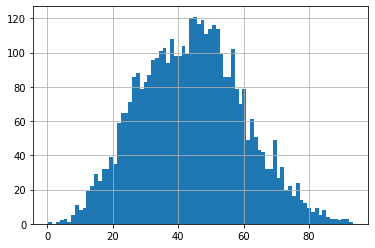

In [10]:
df = df['%']
print('Стандартное отклонение: ', df.std())
print('Среднее: ', df.mean())
df.hist(bins=80)

In [11]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений
print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ', df.mean())
print(MEAN-Delta, MEAN+Delta)

Среднее выборки:  46.05000000000001
Среднее генеральной совокупности:  44.07946954813346
41.05000000000001 51.05000000000001


In [12]:
#df.boxplot(by='%')

In [13]:
# from scipy.stats import norm
# norm.ppf(0.95, loc=0, scale=1)


# Проверка гипотез с помощью Python. 

In [14]:
from scipy import stats  # Импортируем библиотеку
np.random.seed(21)  # Загрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное распределение = scale
A = stats.norm.rvs(loc=50, scale=10, size=500)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 


t, p = stats.ttest_ind(A, B)
t, p

(3.0258839844589733, 0.0025107075866209454)

In [15]:
 stats.ttest_ind(A, B, equal_var = False)

Ttest_indResult(statistic=3.019304910727292, pvalue=0.002609079015138788)

Мы получаем хорошее значение p, равное 0,0026, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
это доказывает, что средние значения двух распределений различны и различие статистически значимо.

#### И действительно, если посмотреть на сгенерированные выборки. 

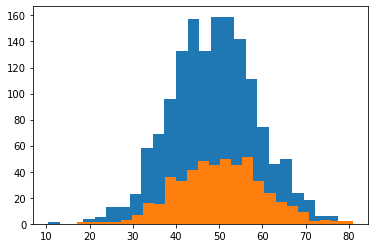

In [16]:
plt.hist(B, bins=25); #Выборка A
plt.hist(A, bins=25);  #Выборка B

In [17]:
# plt.boxplot(A);
# plt.boxplot(B);


# Проверка гипотез

### t-Тест Стьюдента

In [18]:
from scipy import stats
np.random.seed(42)  # Загрепим seed для воспроизводимости результата.

## Определим 2 случайных распределения
N = 100  #Размер выборок


b = np.random.randn(N) #Нормальное распределение с mean = 0 and var = 1
a = np.random.randn(N) + 1.5 #Нормальное распределение с mean = 2 and var = 1
 
### мы получаем хорошее значение p, равное 0,0005, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
### это доказывает, что средние значения двух распределений различны и различие статистически значимо.
 
t , p  = stats.ttest_ind(a, b)
print("t = " + str(t))
print("p = " + str(p))

# Большое значение t-score говорит нам, что группы отличаются
# Маленькие значения t-score говорят нам, что группы схожи

t = 12.348223942992178
p = 2.395356067387906e-26


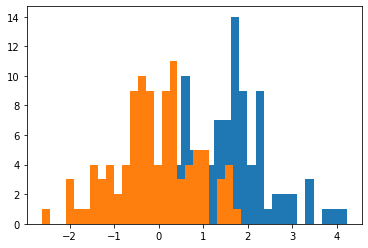

In [19]:
plt.hist(a, bins=25); #Выборка a
plt.hist(b, bins=25);  #Выборка b

# a. Одновыборочный T-test (Выборка + ГС)

<div class="alert alert-info">
<b>Описание: </b>
Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим количество голосующих в Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!
</div>

In [20]:
import scipy.stats as stats
 

population_ages1=stats.norm.rvs(loc=18, scale=45, size=150000)   
population_ages2=stats.norm.rvs(loc=18, scale=10, size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))  # Сгенерировали всю популяцию. 


india_ages1=stats.norm.rvs(loc=18, scale=45, size=9000)  # Индия 1
india_ages2=stats.norm.rvs(loc=18, scale=35, size=9000)
india_ages=np.concatenate((india_ages1,india_ages2)) #Выборка
population_ages.mean()


18.04097903032585

In [21]:
india_ages.mean()

17.912805318044327

In [22]:
stats.ttest_1samp(a=india_ages, popmean=population_ages.mean())

Ttest_1sampResult(statistic=-0.42891365181458957, pvalue=0.6679911980738282)

**Теперь это значение `statistic=0.1197` говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы.**

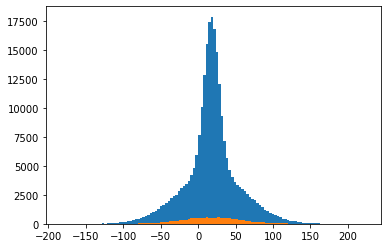

In [23]:
plt.hist(population_ages, bins=120); # Вся популяция.
plt.hist(india_ages, bins=120);  # Выборка

# b. Двух-выборочный T-test (Две выборки)

<div class="alert alert-info">
<b>Описание: </b>
Такой тест показывает, имеют ли две выборки данных разные средние значения (Теперь у нас две разные выборки, а не одна!). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.
</div>

In [24]:
np.random.seed(84)
maharashtra_ages1=stats.norm.rvs(loc=17,scale=5,size=3000)
maharashtra_ages2=stats.norm.rvs(loc=17,scale=15,size=2000)
 

maharashtra_ages=np.concatenate((maharashtra_ages1,maharashtra_ages2))
maharashtra_ages.mean()
 

16.93951973942959

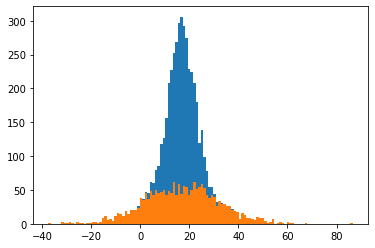

In [25]:
#Расскомментировать, если интересно увидеть отличия визуально
plt.hist(maharashtra_ages, bins=120);
plt.hist(maharashtra_ages2, bins=120);

In [26]:
stats.ttest_ind(a=india_ages, b=maharashtra_ages, equal_var=False)  # Смотри сюда!!! 

Ttest_indResult(statistic=2.929306138816564, pvalue=0.003400545578247028)

**Значение `pvalue= 0.0014` говорит о том, что существует вероятность 0.14%, что данные выборки настолько далеко друг от друга
для двух одинаковых групп. Это меньше, чем уровень достоверности 5%.**

In [27]:
#Расскомментировать, если интересно увидеть отличия визуально
# plt.hist(india_ages, bins=120);
# plt.hist(maharashtra_ages, bins=120);

# c. Paired T-test (Сравнение зависимых)

<div class="alert alert-info">
<b>Описание: </b>
    
T-критерий парной выборки, иногда называемый `t-критерием` зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном `t-тесте` каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного `t-критерия` выборки включают исследования случай-контроль или планы повторных измерений. 

 Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного `t-критерия`. 
</div>

In [28]:
np.random.seed(12)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,245.670775,244.316557,-1.354218
std,31.536594,31.351874,5.157803
min,155.577504,155.560250,-13.370467
25%,227.831705,224.927586,-5.204568
50%,246.688266,246.142588,-1.629565
75%,265.132293,261.730528,1.989948
max,336.154582,332.751176,14.935431


In [29]:
stats.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=2.625571255881005, pvalue=0.01002290520917281)

**Итак, мы видим, что у нас есть только 1% шансов найти такие огромные различия между образцами.**

# Практическое применение t-Тест Стьюдента

<div class="alert alert-info">
<b>Задание: </b>
    
Представим, что вы следователь какой-то крупной рекламной компаннии. 
Ваша задача иследовать рыннок манго в течени последних нескольких лет.
У вас уже есть предварительные данные. Ваши подчиненные решили схалтурить и принести вам совсем другие отчеты. 

Сможели ли вы их разоблачить с помощью t-Тест Стьюдента?
</div>

<p style="align: center;"><img align=center src="https://www.canadianbusiness.com/wp-content/uploads/2012/02/6ed2b4b84defad6ff7b3b813f634.jpg"  width=400></p>



In [30]:
avocado = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/avocado.csv'
Students = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/StudentsPerformance.csv'

A = pd.read_csv(avocado, sep=',', index_col=0, error_bad_lines=False).AveragePrice[:1000]
B = pd.read_csv(Students, sep=',', index_col=0, error_bad_lines=False)['math score']
t, p = stats.ttest_ind(A, B)
t, p

(-135.56983375430264, 0.0)

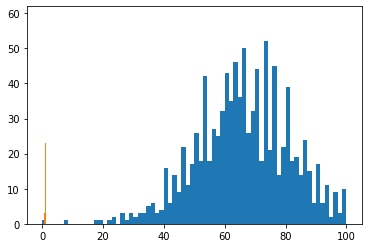

In [31]:
#и действительно выборки пренадлежать разным распределениям

plt.hist(B, bins=70);
plt.hist(A, bins=70);

# $\chi^{2}$ -  Критерий пирсона

In [32]:
import  scipy.stats  as  sps

In [33]:
from scipy.stats import chi2_contingency


In [34]:
# Сгенерируем случайную матрицу 2х2
X, y = np.random.randint(2, size=50).reshape(10, 5), np.random.randint(2, size=10) 
contingency_table = sps.sparse.coo_matrix( (np.ones_like(y), (X[:, 0], y)),    
                                         shape=(np.unique(X[:, 0]).shape[0], 
                                                np.unique(y).shape[0])).A

print('Реальная таблица')
print(contingency_table)
chi2, p, do, expected =  chi2_contingency(contingency_table)

print(chi2, p, do)

print('Ожидаемая таблица')
print(expected)

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

AttributeError: ignored

**Пример использования Хи-квадрат теста**

In [ ]:
from scipy.stats import chi2_contingency

 
table = [[10, 20, 30],[6,  9,  17]]
print(np.array(table))
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно независимы')
else:
    print('Вероятно зависимы')

In [ ]:
subjects = pd.DataFrame(
    [
        [25,46,15],
        [15,44,15],
        [10,10,20]
    ],
    index=['Биология','Химия','Физика'],
    columns=['Math SL AA','Math SL AI','Math HL'])
subjects

**Если рассчитанный хи-квадрат больше критического значения, мы отклоняем нулевую гипотезу.**

In [ ]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects) #  
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = scipy.stats.chi2.ppf(p, dof)
print('chi=%.6f, критическоре значение=%.6f\n' % (chi, critical_value))



if chi > critical_value:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы. 
        Они независимы.""" % (significance))

**В качестве альтернативы мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.**

In [ ]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))

# Точный критерий Фишера 

In [ ]:
import scipy as sp

x = [[107,93],[74,45]]
print(x)
oddsratio, pvalue = sp.stats.fisher_exact(x)
oddsratio, pvalue

# Проанализируем теперь рынок жилья в New York City

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>


<div class="alert alert-info">
<b>Предостирежение: </b>
    
Для построения доверительного интервала с помощью метода, показанного выше, важно, чтобы распределение исследуемой выборки имело нормально распределение
</div>

In [ ]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
#df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)
df.head(4)

In [ ]:
df[df.price<500].price.hist(bins=50)

In [ ]:
print('Можно ли использовать тут наш подход?')

In [ ]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=150)

In [ ]:
# df.neighbourhood_group.hist()

In [ ]:
print(df[df.price<400].price.mean())

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.999) # Возможно вам понадобиться эта функция.

# Задания для самостоятельного решения


In [44]:
import matplotlib.pyplot as plt 
import scipy.stats as stats
import  scipy.stats  as  sps
from scipy import stats 
from scipy.stats import chi2_contingency
import  scipy.stats  as  sps
from bioinfokit.analys import stat
from bioinfokit.analys import get_data
from scipy import stats as st
import math
import pandas as pd
import numpy as np 
import scipy.stats

In [1]:
pip install bioinfokit

     |████████████████████████████████| 92kB 7.7MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56008 sha256=f71fc32804b4c2df4bfef3d9994a98336eecbd9c9b75cc49c79b5248ede1d45b
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=b73b7a525efa0000bf7843526dc89dd460867c5afe3558b827a9525c898738a5
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [23]:
### Ваши код/вычесления...
sigma = math.sqrt(225) # Стандартное отклонение
Z = 0.95 # % # Квантиль нормального распределения.
Delta = 3 #% #Погрешность
N = int(((sigma*Z)/Delta)**2)
N


22

In [24]:
n = 22  #Запишите в эту переменную ваш высчитанный ответ!


In [25]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [26]:
### Ваши код/вычесления...
f_r = 0.99
t_r = 2.33
sqrt = (15/math.sqrt(25))*2.33
pr = (130-(sqrt))
lv = (130+(sqrt))
print(pr)
print(lv)
print(sqrt)

itog = lv - pr
print(itog)

L = 14  #Запишите в эту переменную ваш высчитанный ответ!


123.01
136.99
6.99
13.980000000000004


In [27]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [28]:

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
t, p = stats.ttest_ind(population_men, population_women)
t, p



(1.595286844360484, 0.11064813481019303)

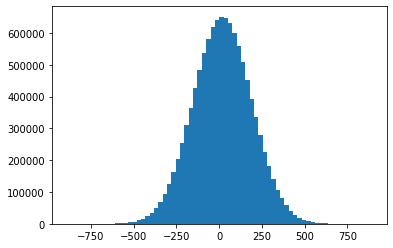

In [29]:
plt.hist(population_men, bins=70);
plt.hist(population_women, bins=70);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [30]:
### Ваш код...
sigma = 150 # Стандартное отклонение
Z = 0.95 # % # Квантиль нормального распределения.
Delta = 50 #% #Погрешность
N = int(((sigma*Z)/Delta)**2)
N

8

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [33]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [40]:
oddsratio, pvalue = stats.fisher_exact(observations)

### Ваш код...
np.random.seed(21)  # Загрепим seed для воспроизводимости результата.

before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)

weight_df = pd.DataFrame({"Ответ волшебника":before, "Реальность":after})
weight_df.describe()

stats.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=1.6822679879140943, pvalue=0.09566854231527926)

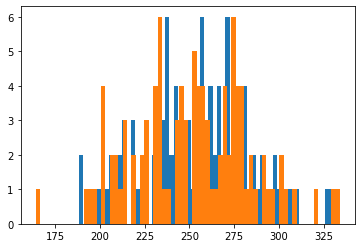

In [41]:
plt.hist(before, bins=70); 
plt.hist(after , bins=70);  

**Вывод:** Итак, мы видим, что у нас есть только 1% шансов найти такие огромные различия между образцами. Мы получаем хорошее значение p, равное 0,01, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом, это доказывает, что средние значения двух распределений различны и различие статистически значимо.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [45]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...
def mean_confidence_interval(data, confidence=0.90):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [46]:
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

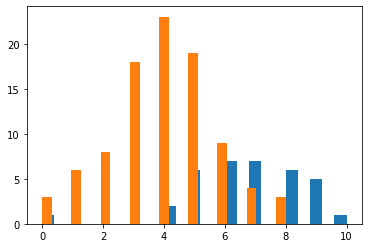

In [48]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:
np.random.seed(21) # Загрепим seed для воспроизводимости результата.

t, p = stats.ttest_ind(data_1,data_2)
t, p

plt.hist(data_1, bins=25); #Выборка data_1
plt.hist(data_2, bins=25); #Выборка data_2



<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

**Ваши выводы:**
p-value = 0.03 говорит о том, что существует вероятность 30%, что данные выборки настолько далеко друг от друга для двух одинаковых групп. Это меньше, чем уровень достоверности 5%.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [49]:
df = get_data('t_ind_samp').data
df.head(2)

,Genotype,yield
0,A,78.0
1,A,84.3


In [50]:
a = df.loc[df['Genotype'] == 'A', 'yield'].to_numpy()
b = df.loc[df['Genotype'] == 'B', 'yield'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=-5.407091104196024, pvalue=0.00029840786595462836)

In [51]:
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=df, xfac="Genotype", res="yield", test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff           -10.3
t                    -5.40709
Std Error             1.90491
df                   10
P-value (one-tail)    0.000149204
P-value (two-tail)    0.000298408
Lower 95.0%         -14.5444
Upper 95.0%          -6.05561
------------------  -------------

Parameter estimates

Level      Number    Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  ------  ---------  -----------  -------------  -------------
A               6    79.1    3.30817      1.35056        75.6283        82.5717
B               6    89.4    3.29059      1.34338        85.9467        92.8533



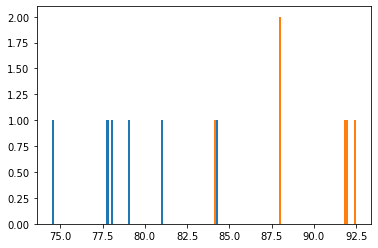

In [52]:
plt.hist(a, bins=70);
plt.hist(b, bins=70);

H0: Эффективности лечения до и после теста равны

HA: Эффективности лечения тестирования не равны

Поскольку p-значение (0,00028) меньше 0,05, мы отвергаем нулевую гипотезу.